# Natural Language Processing

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')

In [ ]:
#Importing the dataset
dataset = pd.read_csv('IMDB Dataset.csv')


In [7]:
 #Cleaning the texts
corpus = []
for review in dataset['review']:
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()

    # Stemming and removing stopwords
    ps = PorterStemmer()
    
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')  # Keep "not" for better sentiment understanding
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)


In [8]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000)  # Increased max_features for better representation
X = cv.fit_transform(corpus).toarray()
y = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values  # Encode target variable


In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
!pip install xgboost


In [11]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [12]:
# Step 7: Evaluate the model on the test set
y_pred =classifier.predict(X_test)

 

In [13]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [14]:
# Displaying the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 87.42%
Confusion Matrix:
[[4376  659]
 [ 599 4366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5035
           1       0.87      0.88      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



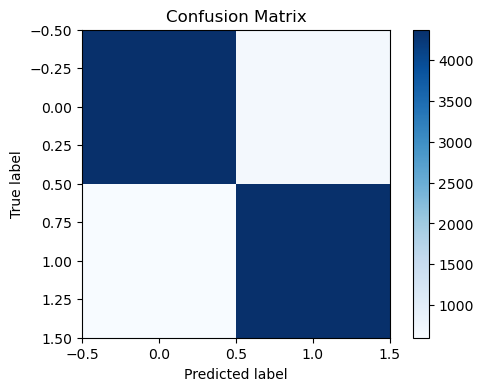

In [15]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
